In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import opmap
from opmap.rawCam import RawCam
from opmap.vmemMap import VmemMap
from opmap.apdMap import APDMap
from opmap.phaseMap import PhaseMap
from opmap.phaseVarianceMap import PhaseVarianceMap

## Parameters

In [3]:
path = "/mnt/recordings/ExperimentData/20161019-2/C001H001S0005/"
cam_type = "sa4"
image_width = 512
image_height = 512
frame_start = 0 
frame_end = 500 # end frame (-1:all)

In [4]:
showFrame = 230

## RawCam

In [5]:
cam = RawCam(
    path,cam_type,
    image_width, image_height,
    frame_start, frame_end
)

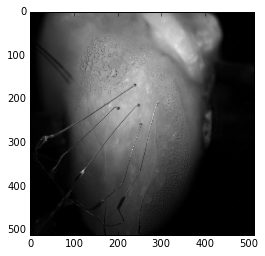

In [6]:
cam.showFrame(showFrame)

## VmemMap

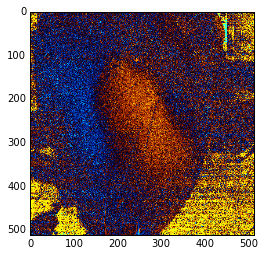

In [7]:
vmem = VmemMap(cam)
vmem.showFrame(showFrame)

In [25]:
vmem.setDiffRange(diff_min=50, diff_max=300)

vmem.setRectROI(top=100)

vmem.showROI()

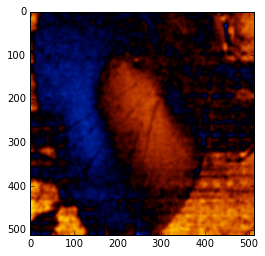

In [8]:
vmem.smooth(3)
vmem.showFrame(showFrame)

## Waveform analysis

In [ ]:
from opmap.f_pixel import f_pixel_apd, f_pixel_updown

In [ ]:
ts = vmem.data[50:, 128, 128]
plt.plot(ts)

In [ ]:
max_beats=10;thre_type='const';thre_up=0.8;thre_down=0.6

f_pixel_updown(ts, thre_type, thre_up, thre_down)

In [ ]:
X = f_pixel_apd(ts, max_beats, thre_type, thre_up, thre_down)
X

## APDMap

In [ ]:
apd = APDMap(vmem, width=64, max_beats=10)

In [ ]:
apd.showFrame(2)
plt.colorbar()

## PhaseMap

In [ ]:
pmap = PhaseMap(vmem)
pmap.showFrame(showFrame)

In [ ]:
pmap.showROI()

In [ ]:
pmap.morphROI(closing=10)
pmap.morphROI(erosion=10)
pmap.setRectROI(top=10)
pmap.showROI()

In [ ]:
pmap.smooth(size=9)
pmap.showFrame(showFrame)

In [ ]:
pmap.saveMovie('./pmap.avi')

## PhaseVarianceMap

In [ ]:
pvmap = PhaseVarianceMap(pmap, size=9)
pvmap.morphROI(erosion=9)
pvmap.showFrame(showFrame)